# Lab Assignment 2



### Name Name, s1234567

## Presentation and coding style (3 marks)

In this assignment, some marks are allocated to your coding style and presentation. Try to make your code more readable using the tips given in your computer lab 2. Make sure your figures have good quality, right size, good range and proper labels.

## Task 1 (4 marks)

In this task we try to use several method from Lab 2 to solve the initial value problem 

\begin{equation}
y' = 3t-4y, \quad y(0)=1,
\end{equation}

Set the step size to $h = 0.05$ and numerically solve this ODE from $t=0$ to $0.5$ using the following methods:

- Forward Euler 

- Adams–Bashforth order 2

- Adams–Bashforth order 3 (we did not code this method in the computer lab, but you can find the formula on [this wikipedia page](https://en.wikipedia.org/wiki/Linear_multistep_method)). For this method, you need to build the very first two steps using other methods. For the first step, use the Euler scheme. For the second step, use Adams–Bashforth order 2. 


Plot the three different approximations, and display the values in a table.

In [124]:
# Import packages
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [125]:
#  defining the function in the RHS of the ODE given in the question
def eqn_dy_dt(y, t):
    return 3*t - 4*y


def ode_Euler(func, times, y0):


    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    # loop for timesteps
    for k in range(nT-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k])*func(y[k, :], times[k])
    return y


def ode_AB2(func, initialTime, finalTime, nSteps, y0):

    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Other steps
    for k in range(1, nSteps):
        y[k+1,:] = y[k,:] + (1.5*func(y[k, :], times[k])-0.5*func(y[k-1, :], times[k-1]))*dt
        
    return y, times 



def ode_AB3(func, initialTime, finalTime, nSteps, y0):

    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Second step using AB2
    y[2,:] = y[1,:] + (1.5*func(y[1, :], times[1])-0.5*func(y[0, :], times[0]))*dt
    for k in range(2, nSteps):
        
        y[k+1,:] = y[k,:] + (23/12)*func(y[k, :], times[k])*dt - (16/12)*func(y[k-1, :], times[k-1])*dt + (5/12)*func(y[k-2,:],times[k-2])*dt
        
    return y, times 






times = np.linspace(0,0.5,11)

eqn_euler = ode_Euler(eqn_dy_dt, times, 1)

eqn_ab2 = ode_AB2(eqn_dy_dt,0.0,0.5,10,1)

eqn_ab3 = ode_AB3(eqn_dy_dt,0.0,0.5,10,1)









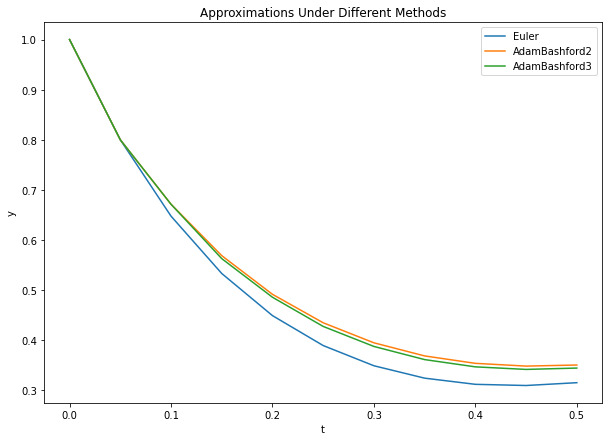

In [126]:
import math
def timesteps(start, stop, h):
    num_steps = math.ceil((stop - start)/h)
    return np.linspace(start, start+num_steps*h, num_steps+1)

def Euler_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    values = ode_Euler(func, times, ics)
    return values, times

def AdamBashford2_step(func, start, stop, h, ics):
    nSteps = math.ceil((stop - start)/h)
    values, times = ode_AB2(func, start, stop, nSteps, ics)
    return values, times

def AdamBashford3_step(func, start, stop, h, ics):
    nSteps = math.ceil((stop - start)/h)
    values, times = ode_AB3(func, start, stop, nSteps, ics)
    return values, times


def produce_df(method, vectorField, start, stop, h, ics):
    values, times = method(vectorField, start, stop, h, ics)
    fn_name = method.__name__
    no = fn_name.find('_')
    fn_name = fn_name[:no]
    return DataFrame(data = values, index = times, columns = [f'{fn_name}'])


A = produce_df(Euler_step, eqn_dy_dt, 0, .5, 0.05, 1)

B = produce_df(AdamBashford2_step, eqn_dy_dt, 0, .5, 0.05, 1)

C = produce_df(AdamBashford3_step, eqn_dy_dt, 0, .5, 0.05, 1)


fig = plt.figure(figsize=(10,7))


for frame in [A,B,C]:
    
    fn_name = frame.columns[0]
    plt.plot(times , frame , label = fn_name)
    

plt.title("Approximations Under Different Methods")
plt.xlabel('t') 
plt.ylabel('y') 
plt.legend()
plt.show()







# plot the results

In [127]:
# printing the solution in a table

pd.concat([A, B,C], axis=1)

,Euler,AdamBashford2,AdamBashford3
0.00,1.000000,1.000000,1.000000
0.05,0.800000,0.800000,0.800000
0.10,0.647500,0.671250,0.671250
0.15,0.533000,0.568625,0.562688
0.20,0.448900,0.491413,0.485574
0.25,0.389120,0.434601,0.427300
0.30,0.348796,0.394612,0.387347
0.35,0.324037,0.368439,0.361096
0.40,0.311729,0.353618,0.346610
0.45,0.309384,0.348127,0.341506


## Task 2 (3 marks)

Use `SymPy` to solve the differential equation $y' = 3t-4y$, with $y(0)=1$, present the analytical solution, and check the exact value of $y(0.5)$.

Compare the result with the approximations from the three methods in Task 1. You may use a table to show the results of each method at $y(0.5)$. Which method is the most/least accurate? Why?

In [128]:
# standard setup
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot



t = sym.symbols('t')
y = sym.Function('y')
eq1 = sym.Eq(y(t).diff(t),3*t-4*y(t))



eq1sol0 = sym.dsolve(eq1, y(t), ics={y(0):1})

eq1sol0

def exact(t):
    return (3/4)*t -(3/16)+19*np.exp(-4*t)/16


D = DataFrame(data=[exact(t) for t in timesteps(0,0.5,0.05)] , index = timesteps(0,0.5,0.05) , columns =['Exact']) 

pd.concat([A, B, C, D], axis=1)







,Euler,AdamBashford2,AdamBashford3,Exact
0.00,1.000000,1.000000,1.000000,1.000000
0.05,0.800000,0.800000,0.800000,0.822243
0.10,0.647500,0.671250,0.671250,0.683505
0.15,0.533000,0.568625,0.562688,0.576714
0.20,0.448900,0.491413,0.485574,0.496078
0.25,0.389120,0.434601,0.427300,0.436857
0.30,0.348796,0.394612,0.387347,0.395168
0.35,0.324037,0.368439,0.361096,0.367834
0.40,0.311729,0.353618,0.346610,0.352252
0.45,0.309384,0.348127,0.341506,0.346292


Write you answer here!

For y(0.5) Adam Bashford 2 has the highest accuracy and Eulers has the least as seen from the above table



the constants of proportionality are different for AB2 and AB3, and presumably the AB3 constant is greater for this step size and is why AB2 provides a more accurate approximation